In [1]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.8 MB/s 


In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
# link = 'https://drive.google.com/file/d/1zB7FDPKT-K_HyK5gwv6042-W16udBvgo/view?usp=share_link
id = '1zB7FDPKT-K_HyK5gwv6042-W16udBvgo'

In [5]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('UkTweets_new.csv',)

In [6]:
df = pd.read_csv('UkTweets_new.csv',index_col=[0])
df

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
0,712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tory t...
1,1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty do quit...
2,558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stand today call borisjohnso...
3,25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford own show always tory care costof...
4,1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...
...,...,...,...,...,...,...,...,...,...,...,...
541723,3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,honestly think liztruss plan cost living crisis
541724,1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,every hour people die poverty uk rise costofli...
541725,545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profit yrs time take stre...
541726,206900588,justalittlechat,"London, England",RT @maxwellwoodger: Attended the Final @Conser...,2022-09-01 00:21:52+00:00,NaN,1.0,0.0,0.0,0.0,attend final leadership debate uk husting fell...


In [7]:
newdata = df.copy()
newdata

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
0,712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tory t...
1,1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty do quit...
2,558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stand today call borisjohnso...
3,25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford own show always tory care costof...
4,1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...
...,...,...,...,...,...,...,...,...,...,...,...
541723,3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,honestly think liztruss plan cost living crisis
541724,1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,every hour people die poverty uk rise costofli...
541725,545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profit yrs time take stre...
541726,206900588,justalittlechat,"London, England",RT @maxwellwoodger: Attended the Final @Conser...,2022-09-01 00:21:52+00:00,NaN,1.0,0.0,0.0,0.0,attend final leadership debate uk husting fell...


In [ ]:
# newdata = newdata.drop('Unnamed: 0', axis=1)
# newdata

In [8]:
newdata.drop_duplicates()
newdata

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
0,712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tory t...
1,1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty do quit...
2,558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stand today call borisjohnso...
3,25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford own show always tory care costof...
4,1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...
...,...,...,...,...,...,...,...,...,...,...,...
541723,3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,honestly think liztruss plan cost living crisis
541724,1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,every hour people die poverty uk rise costofli...
541725,545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profit yrs time take stre...
541726,206900588,justalittlechat,"London, England",RT @maxwellwoodger: Attended the Final @Conser...,2022-09-01 00:21:52+00:00,NaN,1.0,0.0,0.0,0.0,attend final leadership debate uk husting fell...


### TextBlob Sentiment 

In [10]:
# function to calculate subjectivity
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

In [11]:
newdata['Subjectivity'] = newdata['Cleaned_tweets'].apply(getSubjectivity)
newdata

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets,Subjectivity
0,712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tory t...,0.300000
1,1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty do quit...,0.625000
2,558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stand today call borisjohnso...,0.000000
3,25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford own show always tory care costof...,1.000000
4,1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...,0.483333
...,...,...,...,...,...,...,...,...,...,...,...,...
541723,3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,honestly think liztruss plan cost living crisis,0.900000
541724,1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,every hour people die poverty uk rise costofli...,0.666667
541725,545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profit yrs time take stre...,0.000000
541726,206900588,justalittlechat,"London, England",RT @maxwellwoodger: Attended the Final @Conser...,2022-09-01 00:21:52+00:00,NaN,1.0,0.0,0.0,0.0,attend final leadership debate uk husting fell...,1.000000


In [12]:
# function to calculate polarity
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [13]:
newdata['Polarity'] = newdata['Cleaned_tweets'].apply(getPolarity)
newdata

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets,Subjectivity,Polarity
0,712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tory t...,0.300000,-0.125000
1,1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty do quit...,0.625000,0.500000
2,558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stand today call borisjohnso...,0.000000,0.000000
3,25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford own show always tory care costof...,1.000000,0.600000
4,1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...,0.483333,-0.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541723,3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,honestly think liztruss plan cost living crisis,0.900000,0.600000
541724,1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,every hour people die poverty uk rise costofli...,0.666667,-0.700000
541725,545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profit yrs time take stre...,0.000000,0.000000
541726,206900588,justalittlechat,"London, England",RT @maxwellwoodger: Attended the Final @Conser...,2022-09-01 00:21:52+00:00,NaN,1.0,0.0,0.0,0.0,attend final leadership debate uk husting fell...,1.000000,0.000000


In [14]:
# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [15]:
newdata['Analysis'] = newdata['Polarity'].apply(analysis)
newdata

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets,Subjectivity,Polarity,Analysis
0,712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tory t...,0.300000,-0.125000,Negative
1,1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty do quit...,0.625000,0.500000,Positive
2,558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stand today call borisjohnso...,0.000000,0.000000,Neutral
3,25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford own show always tory care costof...,1.000000,0.600000,Positive
4,1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...,0.483333,-0.266667,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541723,3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,honestly think liztruss plan cost living crisis,0.900000,0.600000,Positive
541724,1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,every hour people die poverty uk rise costofli...,0.666667,-0.700000,Negative
541725,545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profit yrs time take stre...,0.000000,0.000000,Neutral
541726,206900588,justalittlechat,"London, England",RT @maxwellwoodger: Attended the Final @Conser...,2022-09-01 00:21:52+00:00,NaN,1.0,0.0,0.0,0.0,attend final leadership debate uk husting fell...,1.000000,0.000000,Neutral


In [16]:
tb_counts = newdata.Analysis.value_counts()
tb_counts

Neutral     237028
Positive    188494
Negative    115990
Name: Analysis, dtype: int64

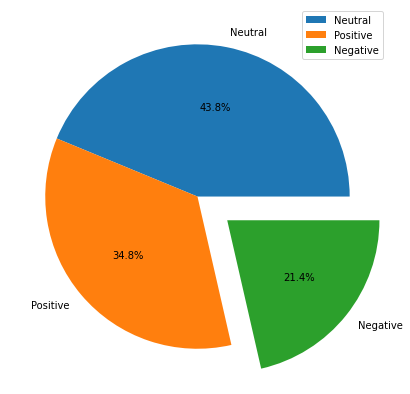

In [17]:
tb_count= newdata.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.savefig('TextBlobSent.png')
plt.legend()

### Vader Senitment

In [18]:

analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment  
def vadersentimentanalysis(tweet):
    vs = analyzer.polarity_scores(tweet)
    return vs['compound']

newdata['Vader Sentiment'] = newdata['Cleaned_tweets'].apply(vadersentimentanalysis)

In [19]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
newdata['Vader Analysis'] = newdata['Vader Sentiment'].apply(vader_analysis)
newdata

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tory t...,0.300000,-0.125000,Negative,-0.5106,Negative
1,1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty do quit...,0.625000,0.500000,Positive,0.3744,Neutral
2,558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stand today call borisjohnso...,0.000000,0.000000,Neutral,-0.5423,Negative
3,25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford own show always tory care costof...,1.000000,0.600000,Positive,0.1280,Neutral
4,1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...,0.483333,-0.266667,Negative,0.2023,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541723,3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,honestly think liztruss plan cost living crisis,0.900000,0.600000,Positive,-0.2732,Neutral
541724,1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,every hour people die poverty uk rise costofli...,0.666667,-0.700000,Negative,-0.8934,Negative
541725,545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profit yrs time take stre...,0.000000,0.000000,Neutral,0.4404,Neutral
541726,206900588,justalittlechat,"London, England",RT @maxwellwoodger: Attended the Final @Conser...,2022-09-01 00:21:52+00:00,NaN,1.0,0.0,0.0,0.0,attend final leadership debate uk husting fell...,1.000000,0.000000,Neutral,0.0000,Neutral


In [20]:
vader_counts = newdata['Vader Analysis'].value_counts()
vader_counts

Neutral     367550
Positive     93444
Negative     80518
Name: Vader Analysis, dtype: int64

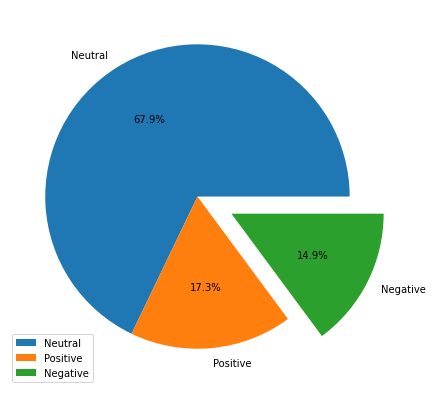

In [21]:
vader_counts= newdata['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.savefig('VaderSent.jpg')
plt.legend()

In [22]:
newdata.to_csv('MSc_Lexicon_Sentiment_new.csv')